<a href="https://colab.research.google.com/github/dweizzz/datathon23/blob/main/AryaLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import matplotlib as plot
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from functools import reduce
import matplotlib.pyplot as plt 

#Dataframes

In [50]:
#Immunization dataframe
df_immunizations = pd.read_csv('Immunizations.csv')
df_immunizations=df_immunizations[['Country','Year','Measure','Value']]
df_immunizations=df_immunizations.rename(columns={'Value': 'Immunization'})
df_immunizations

,Country,Year,Measure,Immunization
0,Australia,2010,% of children immunised,91.6
1,Australia,2011,% of children immunised,91.6
2,Australia,2012,% of children immunised,91.8
3,Australia,2013,% of children immunised,91.0
4,Australia,2014,% of children immunised,91.2
...,...,...,...,...
1841,Peru,2016,% of children immunised,88.6
1842,Peru,2017,% of children immunised,83.0
1843,Peru,2018,% of children immunised,84.0
1844,Peru,2019,% of children immunised,88.0


In [52]:
#density physicians
df_physicians = pd.read_csv('Physicians.csv')
df_physicians = df_physicians[df_physicians['Variable'] == 'Practising physicians']
df_physicians=df_physicians[['Country','Year','Value']]
df_physicians = df_physicians.rename(columns={'Value': 'Number Physicians'})
df_physicians

,Country,Year,Number Physicians
0,Australia,2011,74100.00
1,Australia,2012,75258.00
2,Australia,2013,77974.00
3,Australia,2014,80968.00
4,Australia,2015,83490.00
...,...,...,...
1905,Argentina,2019,4.05
1906,Argentina,2020,4.04
1907,Peru,2012,33669.00
1908,Peru,2016,40352.00


In [53]:
#hospitals dataframe
df_hospitals = pd.read_csv('Hospitals.csv')
df_hospitals.reset_index(inplace=True)  # Reset the index to a simple integer index
df_hospitals=df_hospitals[['index','Country','Year','Variable','Value']]
df_hospitals = df_hospitals.groupby(['Country', 'Year'])['Value'].sum().reset_index()
df_hospitals = df_hospitals.rename(columns={'Value': 'Number Hospitals'})
df_hospitals

,Country,Year,Number Hospitals
0,Australia,2010,3842.85
1,Australia,2011,3842.65
2,Australia,2012,3838.75
3,Australia,2013,3863.11
4,Australia,2014,3724.15
...,...,...,...
382,United States,2015,15631.58
383,United States,2016,15564.03
384,United States,2017,17045.28
385,United States,2018,16869.46


In [54]:
#medium wage dataframe
df_medwage = pd.read_csv('MedianWage.csv')
df_medwage=df_medwage[['Country','Time','Unit Code','Value']]
df_medwage = df_medwage.rename(columns={'Value': 'Median Wage','Time':'Year'})
df_medwage

,Country,Year,Unit Code,Median Wage
0,Australia,2000,AUD,46246.868731
1,Australia,2001,AUD,48315.982391
2,Australia,2002,AUD,50052.758102
3,Australia,2003,AUD,51798.586644
4,Australia,2004,AUD,54199.402711
...,...,...,...,...
2306,Türkiye,2016,USD,30653.260715
2307,Türkiye,2017,USD,30076.378939
2308,Türkiye,2018,USD,30610.715156
2309,Türkiye,2019,USD,32625.050808


In [65]:
df_pharm = pd.read_csv('/content/drive/My Drive/Copy of pharmacists.csv')
df_pharm = df_pharm[df_pharm['Variable'] == 'Practising pharmacists']
df_pharm = df_pharm[df_pharm['Measure'] == 'Number of persons (head counts)']
df_pharm = df_pharm[['Country','Year','COU','Value']]
df_pharm = df_pharm.rename(columns={'Value': 'Number Pharmacists','Time':'Year'})
df_pharm

FileNotFoundError: ignored

#Combining Variable Dataframes

In [55]:
dfs = [df_immunizations,df_physicians, df_hospitals, df_medwage]

#merge all DataFrames into one
all_vars = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year'], how='inner'), dfs)
all_vars.sort_values('Country')

,Country,Year,Measure,Immunization,Number Physicians,Number Hospitals,Unit Code,Median Wage
0,Australia,2011,% of children immunised,91.6,74100.00,3842.65,AUD,72978.599187
107,Australia,2016,% of children immunised,95.0,3.58,3796.71,USD,54708.546394
108,Australia,2017,% of children immunised,94.7,90417.00,2121.88,AUD,80675.497008
109,Australia,2017,% of children immunised,94.7,90417.00,2121.88,AUD,85544.978136
110,Australia,2017,% of children immunised,94.7,90417.00,2121.88,USD,54446.187166
...,...,...,...,...,...,...,...,...
3756,United States,2013,% of children immunised,94.0,809845.00,15982.41,USD,55782.226127
3757,United States,2013,% of children immunised,94.0,809845.00,15982.41,USD,63587.773075
3758,United States,2013,% of children immunised,94.0,809845.00,15982.41,USD,63587.773075
3790,United States,2014,% of children immunised,92.0,2.58,15812.50,USD,64513.441063


#Linear Regression Model

In [62]:
country_specific = all_vars[all_vars['Country'] == 'Lithuania']

y = country_specific['Immunization']
X = country_specific[['Year', 'Number Physicians','Number Hospitals','Median Wage']]
X['Number Physicians Sqrt'] = np.sqrt(X['Number Physicians'])
#X['Num_Physicians_Sq'] = country_specific['Num_Physicians'] ** 2
X['Number Hospitals Sqrt'] = np.sqrt(X['Number Hospitals'])


# Add a constant term to the independent variables to represent the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the OLS model
model = sm.OLS(y_train, X_train)

# Train the model using the fit method
results = model.fit()

# Predict values for the test set
y_pred = results.predict(X_test)

# Get the model summary
summary = results.summary()

# Print the model summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Immunization   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.2796
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.946
Time:                        18:48:29   Log-Likelihood:                -1045.7
No. Observations:                 211   AIC:                             2105.
Df Residuals:                     204   BIC:                             2129.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3344

<ipython-input-62-81055b2171c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Number Physicians Sqrt'] = np.sqrt(X['Number Physicians'])
<ipython-input-62-81055b2171c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Number Hospitals Sqrt'] = np.sqrt(X['Number Hospitals'])


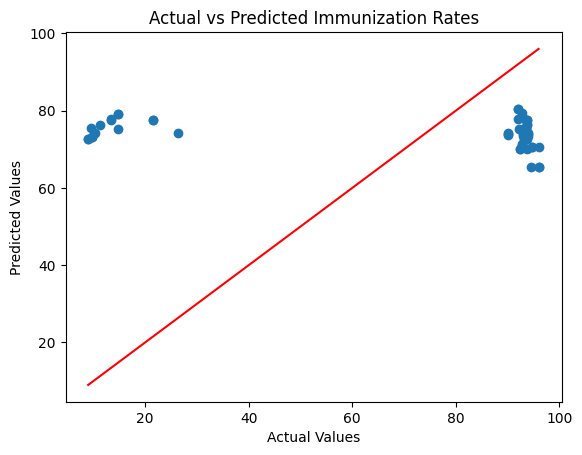

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Immunization Rates')

# Add regression line to plot
x_line = np.arange(min(y_test), max(y_test), 0.1)
y_line = x_line
plt.plot(x_line, y_line, color='red')

plt.show()

In [ ]:
q1 = country_specific.quantile(0.25)
q3 = country_specific.quantile(0.75)
iqr = q3 - q1
outliers = ((country_specific < (q1 - 1.5 * iqr)) | (country_specific > (q3 + 1.5 * iqr))).sum()
print('Outliers in the data:\n', outliers)

Outliers in the data:
 Country           0
Immunization      2
Num_Hospitals     0
Num_Physicians    0
Year              0
dtype: int64


<ipython-input-125-0e1360286543>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = country_specific.quantile(0.25)
<ipython-input-125-0e1360286543>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = country_specific.quantile(0.75)
<ipython-input-125-0e1360286543>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((country_specific < (q1 - 1.5 * iqr)) | (country_specific > (q3 + 1.5 * iqr))).sum()
